In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("train.csv", index_col=0)
test = pd.read_csv("test.csv", index_col=0)

train.head()

,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
ID,,,,,,,,,,,,,,,,,,
ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21454 entries, ID_AAIethGy to ID_zzqQlHgY
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  21454 non-null  object 
 1   year                                     21454 non-null  int64  
 2   urban_or_rural                           21454 non-null  object 
 3   ghsl_water_surface                       21454 non-null  float64
 4   ghsl_built_pre_1975                      21454 non-null  float64
 5   ghsl_built_1975_to_1990                  21454 non-null  float64
 6   ghsl_built_1990_to_2000                  21454 non-null  float64
 7   ghsl_built_2000_to_2014                  21454 non-null  float64
 8   ghsl_not_built_up                        21454 non-null  float64
 9   ghsl_pop_density                         21454 non-null  float64
 10  landcover_crops_fraction           

# 1. Basic EDA

In [4]:
# Get countries present in both train & test
set(train["country"].unique()) & set(test["country"].unique())

set()

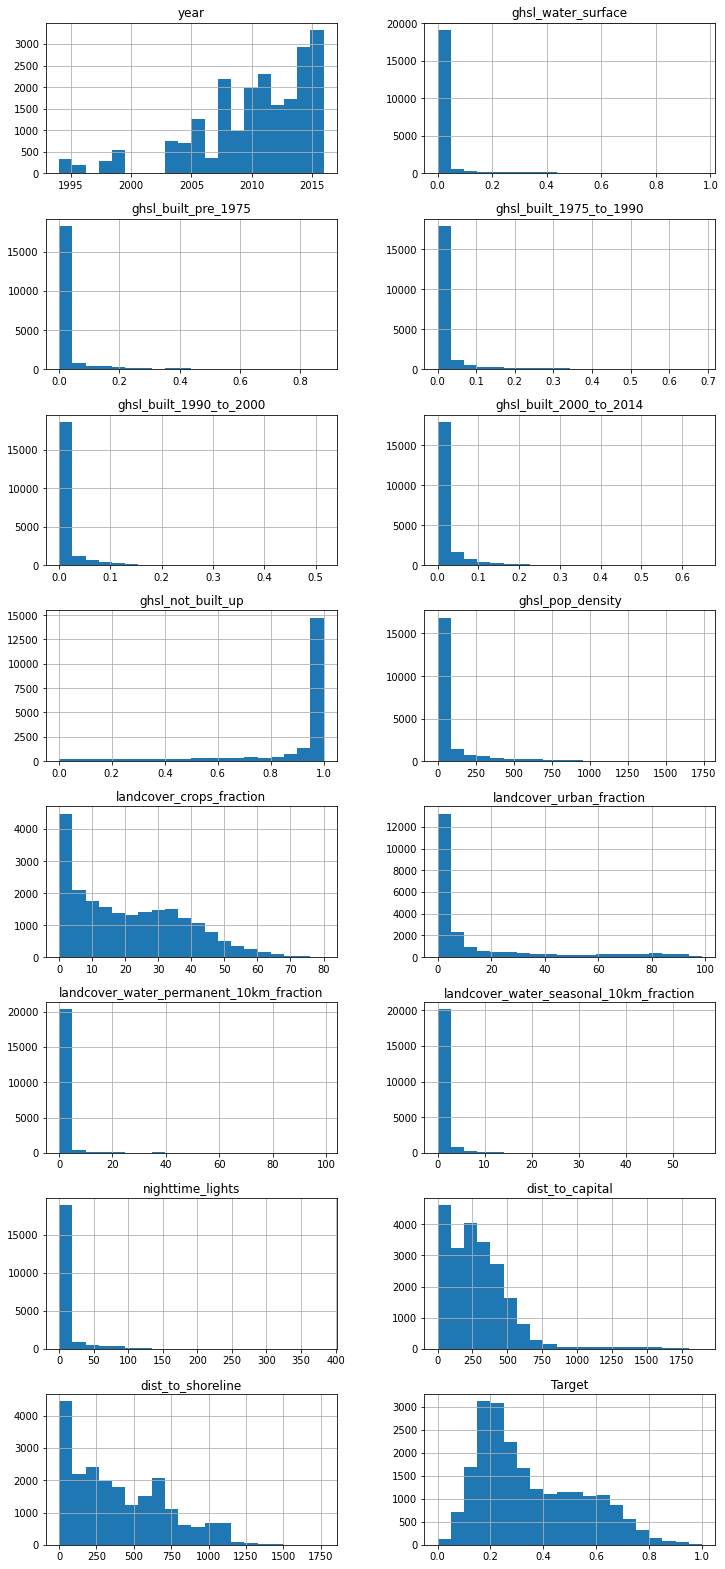

In [5]:
_ = train.hist(figsize=(12, 28), layout=(8, 2), bins=20)

<AxesSubplot:>

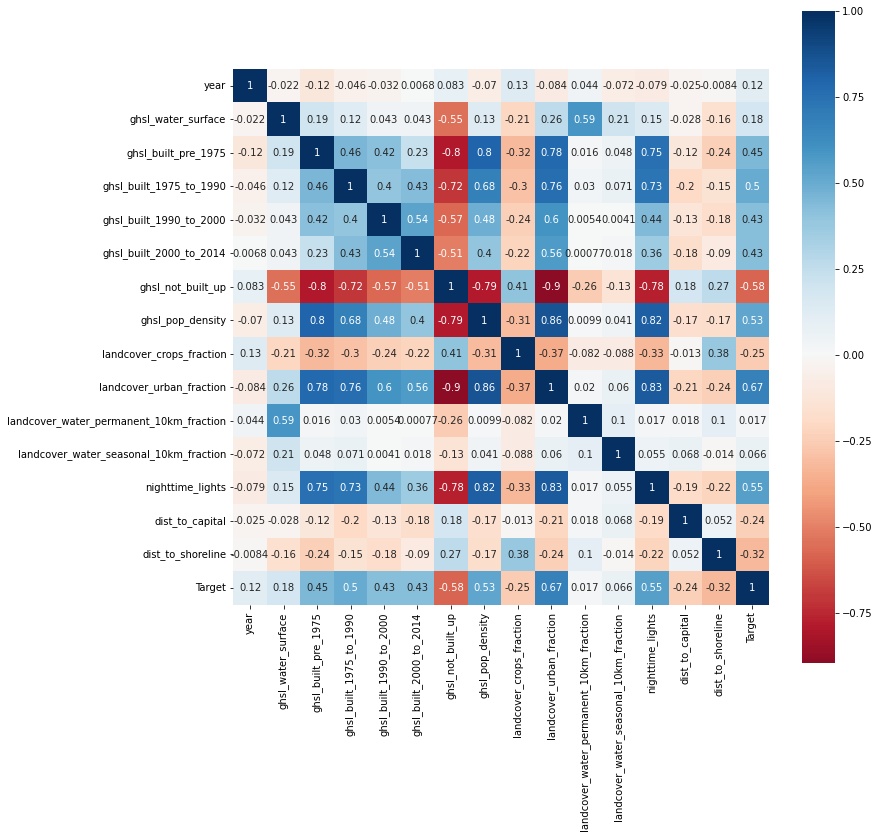

In [6]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(train.corr(), annot=True, center=0, cmap="RdBu", square=True, ax=ax)

# 2. Modelling

In [7]:
X = train.drop(columns=["country", "year", "Target"])
y = train["Target"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

X_train.head()

,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
ID,,,,,,,,,,,,,,,
ID_jGyBihKg,R,0.002697,0.001023,0.002397,0.003534,0.003179,0.987169,7.353644,24.404036,3.228794,0.066941,0.043529,0.000000,215.120631,197.677809
ID_uKeSYzPO,U,0.090653,0.421636,0.364480,0.020317,0.004215,0.098699,1100.950323,0.946576,72.011363,7.599976,1.200540,85.010733,541.645913,5.714430
ID_dPmgRvcJ,R,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,37.604404,0.309854,0.000000,0.002873,0.000000,403.258850,740.512142
ID_pdiYjWcU,U,0.069319,0.630392,0.092109,0.029579,0.001832,0.176769,1024.509616,1.916841,81.902649,0.917554,1.928613,63.763902,200.888480,8.709962
ID_jeaqfTHH,R,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.710724,0.184378,0.000000,0.000000,0.000000,375.501994,131.051240


In [8]:
param_grid = {
    "depth": range(5, 8),
    "l2_leaf_reg": np.linspace(0, 5, 5),
    "early_stopping_rounds": [25],
    "od_pval": [1e-9],
    "subsample": [0.85],
    "verbose": [100]
}
model = CatBoostRegressor(cat_features=[0], random_seed=5, iterations=1000)
best_params, cv_results = model.grid_search(param_grid, X, y, cv=5)

0:	learn: 0.3897081	test: 0.3919899	best: 0.3919899 (0)	total: 56.3ms	remaining: 56.3s
100:	learn: 0.1119299	test: 0.1097139	best: 0.1097139 (100)	total: 671ms	remaining: 5.98s
200:	learn: 0.1063690	test: 0.1051364	best: 0.1051364 (200)	total: 1.63s	remaining: 6.47s
300:	learn: 0.1041021	test: 0.1038584	best: 0.1038584 (300)	total: 2.23s	remaining: 5.18s
400:	learn: 0.1023333	test: 0.1031179	best: 0.1031179 (400)	total: 2.57s	remaining: 3.83s
500:	learn: 0.1007262	test: 0.1025477	best: 0.1025471 (499)	total: 2.9s	remaining: 2.88s
600:	learn: 0.0992888	test: 0.1021506	best: 0.1021506 (600)	total: 3.22s	remaining: 2.14s
700:	learn: 0.0979900	test: 0.1018180	best: 0.1018180 (700)	total: 3.67s	remaining: 1.56s
800:	learn: 0.0968436	test: 0.1015489	best: 0.1015489 (800)	total: 4.04s	remaining: 1s
900:	learn: 0.0957773	test: 0.1012982	best: 0.1012982 (900)	total: 4.4s	remaining: 484ms
999:	learn: 0.0948060	test: 0.1010331	best: 0.1010331 (999)	total: 4.89s	remaining: 0us

bestTest = 0.101033

600:	learn: 0.0975420	test: 0.1015672	best: 0.1015672 (600)	total: 3.87s	remaining: 2.57s
700:	learn: 0.0961231	test: 0.1012157	best: 0.1012157 (700)	total: 4.44s	remaining: 1.9s
800:	learn: 0.0947370	test: 0.1008128	best: 0.1008128 (800)	total: 5.02s	remaining: 1.25s
900:	learn: 0.0935157	test: 0.1005949	best: 0.1005949 (900)	total: 5.55s	remaining: 610ms
999:	learn: 0.0924580	test: 0.1004497	best: 0.1004497 (999)	total: 6.09s	remaining: 0us

bestTest = 0.1004496815
bestIteration = 999

7:	loss: 0.1004497	best: 0.1002559 (5)	total: 38.1s	remaining: 33.3s
0:	learn: 0.3897398	test: 0.3920068	best: 0.3920068 (0)	total: 4.87ms	remaining: 4.87s
100:	learn: 0.1110926	test: 0.1089018	best: 0.1089018 (100)	total: 469ms	remaining: 4.17s
200:	learn: 0.1053125	test: 0.1043937	best: 0.1043937 (200)	total: 946ms	remaining: 3.76s
300:	learn: 0.1028967	test: 0.1031998	best: 0.1031998 (300)	total: 1.49s	remaining: 3.45s
400:	learn: 0.1009228	test: 0.1024150	best: 0.1024150 (400)	total: 1.95s	remainin

0:	learn: 0.3901447	test: 0.3901375	best: 0.3901375 (0)
100:	learn: 0.1090528	test: 0.1104661	best: 0.1104661 (100)
200:	learn: 0.1023566	test: 0.1053219	best: 0.1053219 (200)
300:	learn: 0.0993603	test: 0.1038786	best: 0.1038786 (300)
400:	learn: 0.0966658	test: 0.1029239	best: 0.1029239 (400)
500:	learn: 0.0941738	test: 0.1022887	best: 0.1022887 (500)
600:	learn: 0.0919388	test: 0.1018813	best: 0.1018813 (600)
700:	learn: 0.0899067	test: 0.1015782	best: 0.1015778 (699)
800:	learn: 0.0881017	test: 0.1013469	best: 0.1013469 (800)
900:	learn: 0.0864656	test: 0.1012267	best: 0.1012263 (895)	total: 1m 5s	remaining: 7.21s
999:	learn: 0.0849661	test: 0.1011094	best: 0.1011094 (999)	total: 1m 11s	remaining: 0us


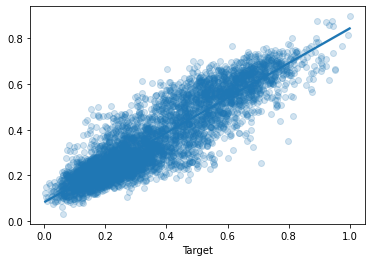

In [9]:
_ = sns.regplot(x=y_valid, y=model.predict(X_valid), scatter_kws={"alpha": 0.2})

In [10]:
mean_squared_error(y_valid, model.predict(X_valid), squared=False)

0.08745026025250724

In [11]:
sample_submission = pd.read_csv('sample_submission.csv', index_col=0)
sample_submission.head()

,Target
ID,
ID_AAcismbB,0
ID_AAeBMsji,0
ID_AAjFMjzy,0
ID_AAmMOEEC,0
ID_ABguzDxp,0


In [12]:
sample_submission['Target'] = model.predict(test.drop(columns=["country", "year"])) 
sample_submission.head()

,Target
ID,
ID_AAcismbB,0.115575
ID_AAeBMsji,0.176273
ID_AAjFMjzy,0.574323
ID_AAmMOEEC,0.404949
ID_ABguzDxp,0.274214


In [13]:
sample_submission.to_csv('submission.csv')